In [324]:
import numpy as np
import pandas as pd

In [334]:
indicator = pd.read_csv("Preprocess Data\问题1-1.csv",encoding='gb18030')
label_1 = indicator.iloc[2:,1:5].to_numpy()
label_2 = indicator.iloc[2:,5:8].to_numpy()
label_3 = indicator.iloc[2:,8:].to_numpy()
indicator

,年份,自然保护区面积(万公顷),森林病虫鼠害防治率(%),森林覆盖率(%),水土流失治理面积,降水量,地表水供水总量(亿立方米),地表水水质达标率/%,空气质量优良天数,市区PM2.5浓度/微克每立方米
0,2000,9.5,97.0,22.3,5328.3,5647.9,34.0,50.0,169.0,68
1,2001,18.9,94.5,22.3,5485.6,4943.3,34.9,52.0,183.5,65
2,2002,28.3,92.0,22.3,5642.9,9679.4,35.8,54.0,198.0,62
3,2003,37.7,89.5,22.3,5791.7,13328.0,36.7,56.0,212.5,59
4,2004,47.1,87.0,22.3,5876.5,11897.0,37.6,58.0,227.0,57
5,2005,56.5,84.5,22.3,5981.2,11798.0,38.5,60.0,256.0,55
6,2006,59.7,81.0,22.3,6076.2,10346.0,38.7,62.0,277.0,53
7,2007,56.6,90.8,22.3,6133.7,11710.0,38.9,64.0,306.0,52
8,2008,56.7,95.8,22.3,6194.0,12632.0,37.8,72.0,320.0,51
9,2009,57.2,100.0,23.4,6230.7,11604.0,37.5,75.0,334.0,51


In [ ]:
indicator = pd.read_csv("Preprocess Data\问题1-1.csv",encoding='gb18030')
label_1 = indicator.iloc[2:,1:5].to_numpy()
label_2 = indicator.iloc[2:,5:8].to_numpy()
label_3 = indicator.iloc[2:,8:].to_numpy()
indicator

# 熵权法

In [335]:
def MinMaxNormalized(x,type,ymin=0,ymax=1):
    """
    实现正向或负向指标MinMax归一化，返回归一化后的数据矩阵；
    x：为原始数据矩阵, 一行代表一个样本, 每列对应一个指标；
    type：设定正向指标1,负向指标2；
    ymin,ymax：归一化的区间端点，即归一化时将数据缩放到(ymin,ymax)的范围内，默认应设置为[0,1]；
    """
    n, m = x.shape
    y = np.zeros((n, m))
    xmin = np.min(x,axis=0)
    xmax = np.max(x,axis=0)
    if type == 1:
        for j in range(m):
            y[:,j] = (ymax-ymin)*(x[:,j]-xmin[j]) / (xmax[j]-xmin[j])+ymin
    elif type == 2:
        for j in range(m):
            y[:,j] = (ymax-ymin)*(xmax[j]-x[:,j]) / (xmax[j]-xmin[j])+ymin
    return y

In [336]:
def Entropy_Weight_Method(x,ind):
    """熵权法（EWM）
    输入变量
    x: 原始数据矩阵, 一行代表一个样本, 每列对应一个指标；
    ind: 指示向量，指示各列正向指标还是负向指标，1表示正向指标，2表示负向指标；
    输出变量
    Y:归一化后的数据
    s:综合加权评分
    w: 各指标权重；
    """
    # n个样本, m个指标
    n,m = x.shape
    # 数据的归一化处理
    # 归一化结果
    Y = np.zeros((n, m))
    for i in range(m):
        if ind[i] == 1: #正向指标归一化
            Y[:,i] = MinMaxNormalized(x[:,i].reshape(-1,1),1,0.0001,0.9999).flatten()
        elif ind[i] == 2: #负向指标归一化
            Y[:,i] = MinMaxNormalized(x[:,i].reshape(-1,1),2,0.0001,0.9999).flatten()
    # 计算第m项指标下第m个样本值占该指标的比重：比重P(i,j)
    P = np.zeros((n, m))
    for i in range(n):
        for j in range(m):
            P[i,j] = Y[i,j] / np.sum(Y[:,j])
    # 第j个指标的熵值e(j)
    e = np.zeros((1,m))
    # 其中k = 1/ln(n)
    k= 1/np.log10(n)
    for j in range(m):
        e[0,j] = -k * np.sum(P[:,j] * np.log10(P[:,j]))
    # 计算信息熵冗余度
    d = np.ones_like(e)-e
    # 计算各项指标的权重
    w = d / np.sum(d) 
    # 计算该样本的综合加权评分
    s = np.sum(w * Y,axis=1).reshape(-1,1)
    return Y,s, w

In [337]:
Y1, s1, w1 = Entropy_Weight_Method(label_1,[1,1,1,1])
Y2, s2, w2 = Entropy_Weight_Method(label_2,[1,1,1])
Y3, s3, w3 = Entropy_Weight_Method(label_3,[1,2])

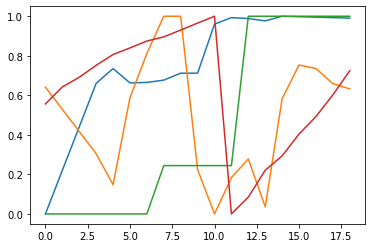

In [338]:
plt.plot(Y1[:])

# 层次分析法

In [339]:
import numpy as np
class AHP:
    #传入的np.ndarray是的判断矩阵
    def __init__(self,array):
        self.array = array
        # 记录矩阵大小
        self.n = array.shape[0]
        # 初始化RI值,用于一致性检验 
        RI_list = [0,0,0.58,0.90,1.12,1.24,1.32,1.41,1.45]
        self.RI = RI_list[self.n-1]
        
    #获取最大特征值和对应的特征向量
    def get_eig(self):
        #numpy.linalg.eig() 计算矩阵特征值与特征向量
        eig_val ,eig_vector = np.linalg.eig(self.array)
        #获取最大特征值
        max_val = np.max(eig_val)
        max_val = round(max_val.real, 4)
        #通过位置来确定最大特征值对应的特征向量
        index = np.argmax(eig_val)
        max_vector = eig_vector[:,index]
        max_vector = max_vector.real.round(4) 
        #添加最大特征值属性
        self.max_val = max_val
        #计算权重向量W
        weight_vector = max_vector/sum(max_vector)
        weight_vector = weight_vector.round(4)
        #打印结果
        print("最大的特征值: "+str(max_val))
        print("对应的特征向量为: "+str(max_vector))
        print("归一化后得到权重向量: "+str(weight_vector))
        return weight_vector
    
    #测试一致性
    def test_consitst(self):
        #计算CI值
        CI = (self.max_val-self.n)/(self.n-1) 
        CI = round(CI,4) 
        #打印结果
        print("判断矩阵的CI值为" +str(CI))
        print("判断矩阵的RI值为" +str(self.RI))
        #分类讨论
        if self.n == 2:
            print("仅包含两个子因素，不存在一致性问题")
        else:
            #计算CR值
            CR = CI/self.RI 
            CR = round(CR,4)
            #CR < 0.10才能通过检验
            if  CR < 0.10 :
                print("判断矩阵的CR值为" +str(CR) + "，通过一致性检验")
                return True
            else:
                print("判断矩阵的CR值为" +str(CR) + "，未通过一致性检验")
                return False

1. 指标1：$\begin{bmatrix} 1  &  3  & \frac{1}{3} & \frac{1}{5}\\ \frac{1}{3}  & 1 & \frac{1}{5}  &  \frac{1}{7} \\ 3 & 5 &  1& \frac{1}{3}\\ 5 & 7 &  3 &1 \end{bmatrix}$
2. 指标2：$\begin{bmatrix} 1 & 3 & \frac{1}{3}\\ \frac{1}{3}  & 1 & \frac{1}{5}\\ 3 &  5 & 1 \end{bmatrix} $
3. 指标3：$\begin{bmatrix} 1 & 3 \\  \frac{1}{3} & 1 \end{bmatrix}$

In [340]:
A = np.array([[1, 3, 1/3, 1/5],
              [1/3, 1, 1/5, 1/7],
              [3, 5, 1, 1/3],
              [5, 7, 3, 1]])
B = np.array([[1, 3, 1/3],
              [1/3, 1, 1/5],
              [3, 5, 1]])
# 构造成对比较矩阵
C = np.array([[1, 3],
              [1/3, 1]])

In [341]:
model = AHP(A)
model.get_eig()
model.test_consitst()

最大的特征值: 4.117
对应的特征向量为: [0.1847 0.0869 0.4121 0.888 ]
归一化后得到权重向量: [0.1175 0.0553 0.2622 0.565 ]
判断矩阵的CI值为0.039
判断矩阵的RI值为0.9
判断矩阵的CR值为0.0433，通过一致性检验


True

In [342]:
model= AHP(B)
model.get_eig()
model.test_consitst()

最大的特征值: 3.0385
对应的特征向量为: [0.3715 0.1506 0.9161]
归一化后得到权重向量: [0.2583 0.1047 0.637 ]
判断矩阵的CI值为0.0192
判断矩阵的RI值为0.58
判断矩阵的CR值为0.0331，通过一致性检验


True

In [343]:
model_1 = AHP(C)
model_1.get_eig()
model_1.test_consitst()

最大的特征值: 2.0
对应的特征向量为: [0.9487 0.3162]
归一化后得到权重向量: [0.75 0.25]
判断矩阵的CI值为0.0
判断矩阵的RI值为0
仅包含两个子因素，不存在一致性问题


# 主客观权重组合

In [344]:
# 客观-熵权法
Y1, s1, w1 = Entropy_Weight_Method(label_1,[1,1,1,1])
Y2, s2, w2 = Entropy_Weight_Method(label_2,[1,1,1])
Y3, s3, w3 = Entropy_Weight_Method(label_3,[1,2])
# 主观-层次分析法
W1 = [0.1175, 0.0553, 0.2622 ,0.565]
W2 = [0.2583, 0.1047, 0.637]
W3 = [0.75, 0.25]

- 组合权重（乘法组合）
$ W_{j}=\frac{\sqrt{\alpha_{j} \beta_{j}}}{\sum_{j=1}^{n} \sqrt{\alpha_{j} \beta_{j}}}$

In [345]:
def combine_weight(a,b):
    a, b = np.array(a),np.array(b)
    return np.sqrt(a*b)/np.sqrt(a*b).sum()

In [346]:
CW1 = combine_weight(w1,W1)
CW2 = combine_weight(w2,W2)
CW3 = combine_weight(w3,W3)
print(CW1)
print(CW2)
print(CW3)

[[0.1179399  0.11883283 0.44478966 0.31843761]]
[[0.20062565 0.29641816 0.50295619]]
[[0.58714964 0.41285036]]


# 计算三个一级权重

In [347]:
label_1 = (Y1*CW1).sum(axis=1).reshape(-1,1)
label_2 = (Y2*CW2).sum(axis=1).reshape(-1,1)
label_3 = (Y3*CW3).sum(axis=1).reshape(-1,1)
label_data = np.hstack((label_1,label_2,label_3))

In [348]:
# 变异系数
def CV(x):
    return np.std(x,axis=0)/np.mean(x,axis=0)

label_cv = CV(label_data)
FCI = label_cv/np.sum(label_cv)
FCI

array([0.25791788, 0.41090648, 0.33117563])

In [372]:
FCI_data = (FCI*label_data).sum(axis=1)*100
x = np.arange(2002,2021,1).reshape(-1,1)
FCI_data = np.hstack((x,FCI_data.reshape(-1,1)))
pd.DataFrame(FCI_data).to_csv(r'Preprocess Data\FCI_data.csv',header=None,index=None)
FCI_data

array([[2002.        ,    8.46298179],
       [2003.        ,   18.7090849 ],
       [2004.        ,   21.38948287],
       [2005.        ,   27.95134136],
       [2006.        ,   30.78861789],
       [2007.        ,   39.34126574],
       [2008.        ,   47.19599303],
       [2009.        ,   52.58541446],
       [2010.        ,   55.06330357],
       [2011.        ,   60.24234059],
       [2012.        ,   45.34198391],
       [2013.        ,   31.28244487],
       [2014.        ,   47.4364239 ],
       [2015.        ,   60.10054116],
       [2016.        ,   67.36594027],
       [2017.        ,   74.98324887],
       [2018.        ,   79.0385866 ],
       [2019.        ,   82.31652305],
       [2020.        ,   85.86676245]])

In [350]:
import matplotlib.pyplot as plt

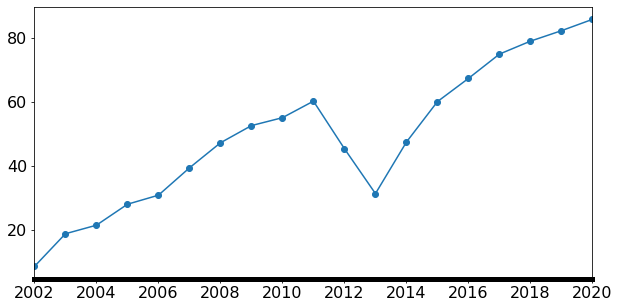

In [366]:
fig,ax = plt.subplots(figsize=(10,5))
ax.plot(x, FCI_data,'-o')
ax.spines['bottom'].set_linewidth(5)
ax.set_xlim(2002,2020)
ax.tick_params(labelsize=16)